<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning-Projects/blob/main/13.%20Picture%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import fastai

In [3]:
! git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [4]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [5]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 60185 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [7]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path=Path('train')
path.ls()

(#3) [Path('train/Airplane'),Path('train/Boat'),Path('train/Car')]

In [8]:
fls=get_image_files(path)
fls

(#600) [Path('train/Airplane/cb656dd45e964c2a.jpg'),Path('train/Airplane/b808b3926de24238.jpg'),Path('train/Airplane/1b67847542838911.jpg'),Path('train/Airplane/682d1e1ae0586b39.jpg'),Path('train/Airplane/0516d37b16c72640.jpg'),Path('train/Airplane/9fdc0b053fdef1c9.jpg'),Path('train/Airplane/92582d862a8908a1.jpg'),Path('train/Airplane/122fb7b80b0b8f24.jpg'),Path('train/Airplane/3a2dc5334900925c.jpg'),Path('train/Airplane/cfff357e95a11fc8.jpg')...]

In [9]:
failed=verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

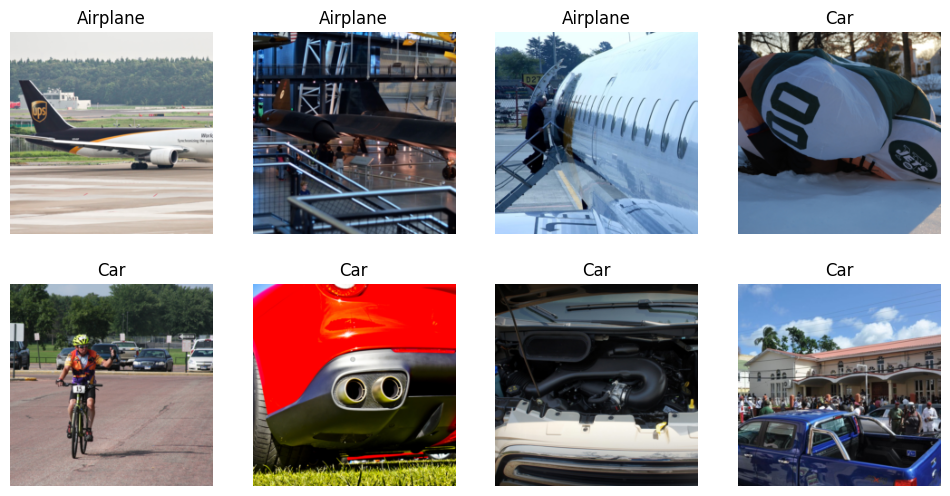

In [12]:
transports=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Dataloader
dls=transports.dataloaders(path)

#check
dls.train.show_batch(max_n=8, nrows=2)

In [14]:
learn=cnn_learner(dls,resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.418664,0.206381,0.925000,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.459172,0.234943,0.908333,00:08
1,0.340078,0.216745,0.941667,00:09
2,0.250317,0.237400,0.941667,00:12
3,0.190458,0.241139,0.933333,00:11


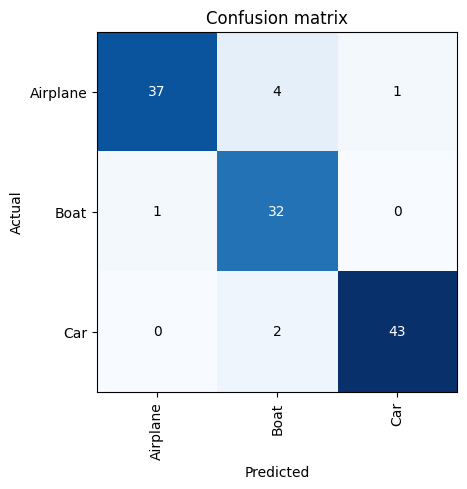

In [15]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

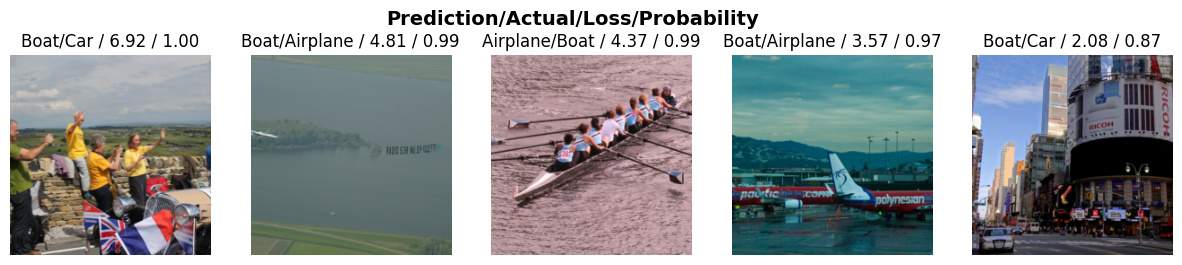

In [18]:
interp.plot_top_losses(5, nrows=1)

In [19]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Car
Probability: 0.9999583959579468


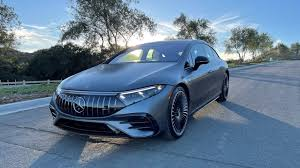

In [23]:
img=PILImage.create(upload.data[-1])
pred, pred_id, prob=learn.predict(img)
print(f'Prediction: {pred}')
print(f'Probability: {prob[pred_id]}')
img

# **Model to Product**

In [25]:
#save our trained model

learn.export('transport_model.pkl')

In [26]:
#checking
ourmodel=load_learner('/content/transport_model.pkl')

In [28]:
ourmodel.predict(img)
#worked

('Car', tensor(2), tensor([3.6720e-05, 4.8847e-06, 9.9996e-01]))

In [ ]:
#Then, download this model.